In [1]:
# imports
import sqlalchemy
from sqlalchemy import create_engine, Column, String, Integer, Numeric, MetaData, Table, type_coerce, ForeignKey, case
from sqlalchemy.orm import mapper, create_session, relationship, aliased, Session
from sqlalchemy.ext.declarative import declarative_base
import csv
from sqlalchemy import case
import numpy as np
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import sqlalchemy.types as types
import numbers
from sqlalchemy.sql import and_, or_, not_, func
from sqlalchemy.sql import select
import os
import glob
import re
from os.path import isfile
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import gsw
import matplotlib.cm as cmm
import matplotlib.colors as col
import matplotlib.colors as col
import createDBfromDFO_OPDB
from netCDF4 import Dataset
import datetime as dt
import dateutil as dutil
%matplotlib inline

In [2]:
# definitions
basepath='/ocean/eolson/MEOPAR/obs/'
basedir=basepath + 'NANOOS_PRISMCRUISES/'
dbname='PRISM'

In [3]:
# if PRISM.sqlite does not exist, run script to create it
if not isfile(basedir + dbname + '.sqlite'):
    createDBfromCSV_PRISM.main()
    print('done')
else:
    print('file exists')

file exists


In [4]:
engine = create_engine('sqlite:///' + basedir + dbname + '.sqlite')

In [5]:
Base = automap_base()
# reflect the tables in salish.sqlite:
Base.prepare(engine, reflect=True)
# mapped classes have been created
InfoTBL=Base.classes.InfoTBL
CastTBL=Base.classes.CastTBL
ObsTBL=Base.classes.ObsTBL
session = create_session(bind = engine, autocommit = False, autoflush = True)

In [6]:
vartypes=session.query(ObsTBL.variable).group_by(ObsTBL.variable).all()
print(vartypes)

[('ammonium_concentration',), ('chl_concentration',), ('light_transmissivity',), ('nitrate_concentration',), ('nitrite_concentration',), ('oxygen_concentration',), ('phaeophytin_concentration',), ('phosphate_concentration',), ('photosynthetically_active_radiation',), ('potential_density_sigmat',), ('silicate_concentration',), ('turbidity',), ('water_pressure',), ('water_salinity',), ('water_temperature',)]


In [17]:
test=session.query(ObsTBL.cast_dbid, ObsTBL.cast_datetime,ObsTBL.depth,ObsTBL.value).filter(ObsTBL.cast_dbid==1163,ObsTBL.variable=='nitrate_concentration').all()
for row in test:
    print(row)
# checked: this is really in the original input files

(1163, '1998-06-16 02:05:32.999998', Decimal('2.2000000000'), Decimal('2.2999780228'))
(1163, '1998-06-16 02:05:32.999998', Decimal('2.2000000000'), Decimal('0.5999936758'))
(1163, '1998-06-16 02:05:32.999998', Decimal('7.3000000000'), Decimal('20.2993302683'))
(1163, '1998-06-16 02:05:32.999998', Decimal('12.3000000000'), Decimal('23.3987108880'))
(1163, '1998-06-16 02:05:32.999998', Decimal('22.2000000000'), Decimal('25.6974331679'))
(1163, '1998-06-16 02:05:32.999998', Decimal('32.1000000000'), Decimal('25.5963068033'))
(1163, '1998-06-16 02:05:32.999998', Decimal('52.0000000000'), Decimal('24.9941570792'))
(1163, '1998-06-16 02:05:32.999998', Decimal('87.1000000000'), Decimal('24.5903776051'))


In [18]:
test=session.query(ObsTBL.cast_dbid, ObsTBL.cast_datetime,ObsTBL.depth,ObsTBL.value).filter(ObsTBL.cast_dbid==1207,ObsTBL.variable=='nitrate_concentration').all()
for row in test:
    print(row)
# checked: this is really in the original input files

(1207, '1998-12-17 15:10:30.000003', Decimal('2.0000000000'), Decimal('22.1000000000'))
(1207, '1998-12-17 15:10:30.000003', Decimal('2.0000000000'), Decimal('22.3000000000'))
(1207, '1998-12-17 15:10:30.000003', Decimal('2.0000000000'), Decimal('22.3000000000'))
(1207, '1998-12-17 15:10:30.000003', Decimal('3.6000000000'), Decimal('23.6000000000'))
(1207, '1998-12-17 15:10:30.000003', Decimal('3.6000000000'), Decimal('23.6000000000'))
(1207, '1998-12-17 15:10:30.000003', Decimal('5.6000000000'), Decimal('25.3000000000'))
(1207, '1998-12-17 15:10:30.000003', Decimal('5.6000000000'), Decimal('25.3000000000'))
(1207, '1998-12-17 15:10:30.000003', Decimal('7.0000000000'), Decimal('25.9000000000'))
(1207, '1998-12-17 15:10:30.000003', Decimal('7.0000000000'), Decimal('25.9000000000'))
(1207, '1998-12-17 15:10:30.000003', Decimal('9.4000000000'), Decimal('26.1000000000'))
(1207, '1998-12-17 15:10:30.000003', Decimal('9.4000000000'), Decimal('26.1000000000'))
(1207, '1998-12-17 15:10:30.0000

In [9]:
test=session.query(CastTBL.cast_datetime, ObsTBL.cast_datetime, CastTBL.cast_lat, ObsTBL.cast_lat, CastTBL.cast_lon, ObsTBL.cast_lon).\
    select_from(ObsTBL).join(CastTBL, CastTBL.cast_dbid==ObsTBL.cast_dbid).limit(250).all()
jj=0
for row in test:
    jj+=1
    if jj%50==1:
        print(row)

('2008-08-11 13:37:23.999996', '2008-08-11 13:37:23.999996', Decimal('47.5968166667'), Decimal('47.5968166667'), Decimal('-122.3650166670'), Decimal('-122.3650166670'))
('2008-08-11 13:37:23.999996', '2008-08-11 13:37:23.999996', Decimal('47.5968166667'), Decimal('47.5968166667'), Decimal('-122.3650166670'), Decimal('-122.3650166670'))
('2008-08-11 13:37:23.999996', '2008-08-11 13:37:23.999996', Decimal('47.5968166667'), Decimal('47.5968166667'), Decimal('-122.3650166670'), Decimal('-122.3650166670'))
('2008-08-11 13:37:23.999996', '2008-08-11 13:37:23.999996', Decimal('47.5968166667'), Decimal('47.5968166667'), Decimal('-122.3650166670'), Decimal('-122.3650166670'))
('2008-08-11 13:37:23.999996', '2008-08-11 13:37:23.999996', Decimal('47.5968166667'), Decimal('47.5968166667'), Decimal('-122.3650166670'), Decimal('-122.3650166670'))


In [12]:
test=session.query(ObsTBL.cast_datetime, func.count()).group_by(ObsTBL.cast_datetime).limit(5).all()
for row in test:
    print(row)

('1998-06-15 20:41:34.000004', 1772)
('1998-06-15 22:19:33.000001', 1994)
('1998-06-16 00:25:29.000005', 2431)
('1998-06-16 02:05:32.999998', 1492)
('1998-06-16 04:53:34.000005', 3783)


In [14]:
print(session.query(ObsTBL).filter(ObsTBL.cast_dbid==262).count())

469


In [7]:
q=session.query(ObsTBL.cast_lat, ObsTBL.cast_lon,ObsTBL.cast_datetime, ObsTBL.depth, ObsTBL.value).\
    filter(ObsTBL.variable=='nitrate_concentration',ObsTBL.cast_lat>48.2)
Lats=[]
Lons=[]
DTs=[]
Zs=[]
Ns=[]
for Lat, Lon, DT, Z, N in q.all():
    Lats.append(float(Lat))
    Lons.append(float(Lon))
    DTs.append(dutil.parser.parse(DT))
    Zs.append(float(Z))
    Ns.append(float(N))

/home/eolson/anaconda3/envs/teos10/lib/python3.4/site-packages/sqlalchemy/sql/sqltypes.py:562: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


 ...]

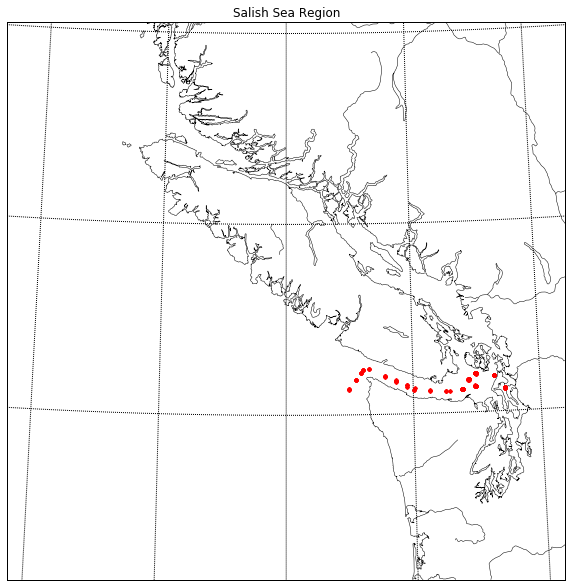

In [8]:
# map:
width = 650000; lon_0 = -126; lat_0 = 49.2
plt.figure(figsize=(10,10))
m = Basemap(width=width,height=width,projection='aeqd', resolution='h',
            lat_0=lat_0,lon_0=lon_0)
# fill background.
m.drawmapboundary()
# draw coasts and fill continents.
m.drawcoastlines(linewidth=0.5)
m.drawrivers()
#m.shadedrelief()
# 20 degree graticule.
m.drawparallels(np.arange(40,60,2))
m.drawmeridians(np.arange(-130,-110,2))
plt.title('Salish Sea Region')
xpt, ypt = m(Lons, Lats)
m.plot([xpt],[ypt],'r.')

In [9]:
print(np.shape(Lons))
Years=[i.year for i in DTs]
Months=[i.month for i in DTs]

(1294,)


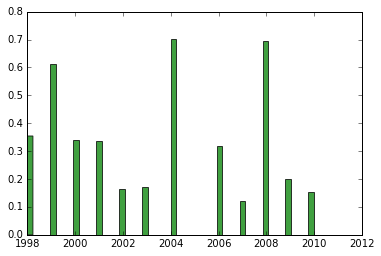

In [10]:
# the histogram of the data
n, bins, patches = plt.hist(Years, 50, normed=1, facecolor='green', alpha=0.75)


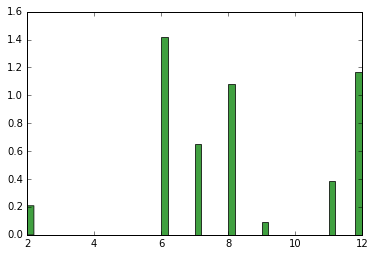

In [11]:
# the histogram of the data
n, bins, patches = plt.hist(Months, 50, normed=1, facecolor='green', alpha=0.75)


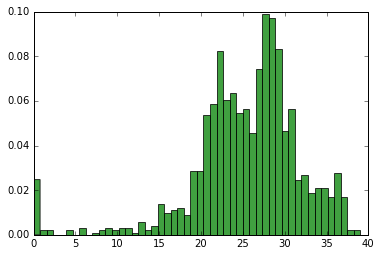

In [12]:
# the histogram of the data
n, bins, patches = plt.hist(Ns, 50, normed=1, facecolor='green', alpha=0.75)


In [21]:
print(DTs[0].year)

2008


In [88]:
session.close()
engine.dispose()